# 서울시 유가 정보 분석

In [72]:
import pandas as pd

# file name 합치기
from glob import glob

In [73]:
station_files = glob("../Data/oil/*.xls")
station_files

['../Data/oil/지역_위치별(주유소) (1).xls',
 '../Data/oil/지역_위치별(주유소) (10).xls',
 '../Data/oil/지역_위치별(주유소) (11).xls',
 '../Data/oil/지역_위치별(주유소) (12).xls',
 '../Data/oil/지역_위치별(주유소) (13).xls',
 '../Data/oil/지역_위치별(주유소) (14).xls',
 '../Data/oil/지역_위치별(주유소) (15).xls',
 '../Data/oil/지역_위치별(주유소) (16).xls',
 '../Data/oil/지역_위치별(주유소) (17).xls',
 '../Data/oil/지역_위치별(주유소) (18).xls',
 '../Data/oil/지역_위치별(주유소) (19).xls',
 '../Data/oil/지역_위치별(주유소) (2).xls',
 '../Data/oil/지역_위치별(주유소) (20).xls',
 '../Data/oil/지역_위치별(주유소) (21).xls',
 '../Data/oil/지역_위치별(주유소) (22).xls',
 '../Data/oil/지역_위치별(주유소) (23).xls',
 '../Data/oil/지역_위치별(주유소) (24).xls',
 '../Data/oil/지역_위치별(주유소) (3).xls',
 '../Data/oil/지역_위치별(주유소) (4).xls',
 '../Data/oil/지역_위치별(주유소) (5).xls',
 '../Data/oil/지역_위치별(주유소) (6).xls',
 '../Data/oil/지역

In [74]:
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name,header=2)
    tmp_raw.append(tmp)
station_raw = pd.concat(tmp_raw)

In [75]:
len(station_raw)

456

In [76]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,2145,2170,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,2183,2207,-
2,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2305,2183,2199,-
3,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,2210,2235,1600
4,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,2355,2215,2239,1943


In [77]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      456 non-null    object
 1   상호      456 non-null    object
 2   주소      456 non-null    object
 3   상표      456 non-null    object
 4   전화번호    456 non-null    object
 5   셀프여부    456 non-null    object
 6   고급휘발유   456 non-null    object
 7   휘발유     456 non-null    object
 8   경유      456 non-null    object
 9   실내등유    456 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [78]:
# 필요 항목 발췌
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                         '주소':station_raw['주소'],
                         '가격':station_raw['휘발유'],
                         '셀프':station_raw['셀프여부'],
                         '상표':station_raw['상표']
})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스


In [79]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  456 non-null    object
 1   주소         456 non-null    object
 2   가격         456 non-null    object
 3   셀프         456 non-null    object
 4   상표         456 non-null    object
dtypes: object(5)
memory usage: 21.4+ KB


In [80]:
# 주유소별 자치구 항목 추가 
stations['구'] = [region.split()[1] for region in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구


In [81]:
# 구 컬럼 다른 데이터 없는지 확인 
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [82]:
# 여러개 파일을 합하여 만든 데이터셋이기 때문에 index 중복있다. 
# 재배열을 해줘야 한다. 
stations.reset_index(inplace=True, drop=True)
stations

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구
...,...,...,...,...,...,...
451,대청주유소,서울 강남구 개포로 654 (일원동),2566,N,SK에너지,강남구
452,갤러리아주유소,서울 강남구 압구정로 426,2593,N,SK에너지,강남구
453,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2595,N,GS칼텍스,강남구
454,SK논현주유소,서울 강남구 논현로 747 (논현동),2598,N,SK에너지,강남구


In [83]:
 # 가격 정보가 '-'인 곳 확인 
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
97,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
221,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
233,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
263,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
272,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
283,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
357,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
358,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
379,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [84]:
# '-' 처리 : 일단 가격은 추측할 방도가 없기 때문에 drop 할 것임 
# 1) nan으로 바꿔서 dropna 하기 
# 2) 다른 방법 : '-'인 인덱스를 불러와서 drop 

removeIndex = stations[stations['가격'] == '-'].index

In [85]:
stations.drop(removeIndex, axis = 'index', inplace = True)
len(stations)

447

In [86]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    object
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [87]:
# 가격컬럼의 Type 변환 
# - 딕셔너리 쓰면 하나씩 골라서 할 수 있음 
stations = stations.astype({'가격' : 'int'})
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    int64 
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.4+ KB


---
# 시각화

In [88]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구


In [89]:
import matplotlib.pyplot as plt

In [90]:
import warnings
warnings.filterwarnings('ignore')

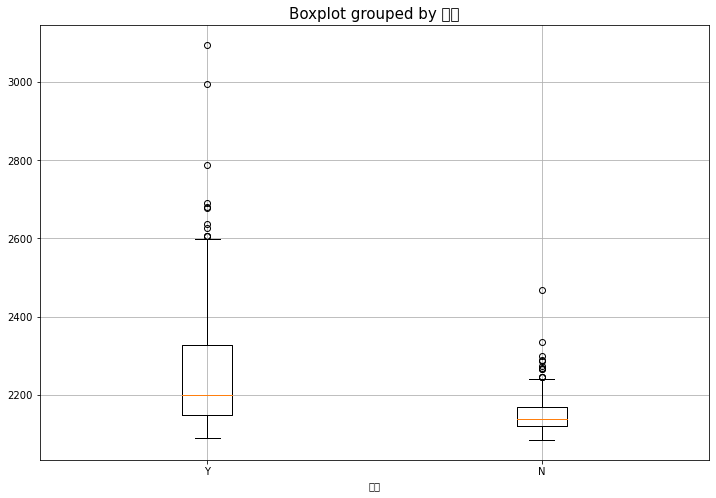

In [91]:
# 그래프 객체 생성 
fig = plt.figure(figsize=(12,8))

# 수직 박스 플롯 
plt.boxplot(
    x = [
        stations[stations['셀프'] == 'N']['가격'],  
        stations[stations['셀프'] == 'Y']['가격'],  
    ],
    labels = stations.셀프.unique()
)

plt.title('Boxplot grouped by 셀프', size = 15)
plt.xlabel('셀프')
plt.grid()
plt.show()

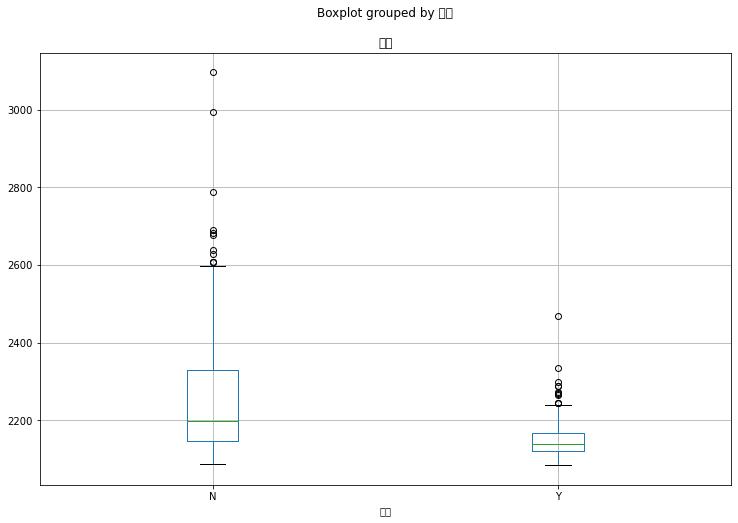

In [92]:
# python 기본 그래프 (다해주네..)
stations.boxplot(column='가격',by = '셀프', figsize=(12,8))
plt.show()

In [93]:
import seaborn as sns

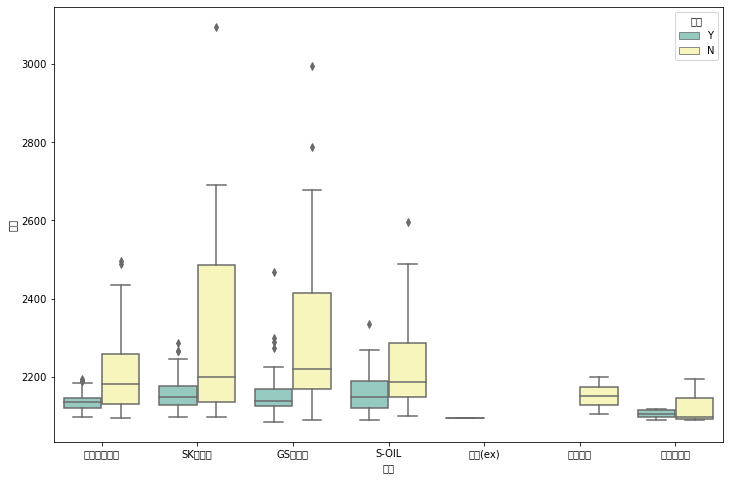

In [94]:
# 상표, 가격, 셀프를 boxplot으로 그리기
# seaborn 사용해야 함 
plt.figure(figsize=(12,8))
sns.boxplot(
    x = '상표',
    y = '가격',
    hue = '셀프',
    palette='Set3',
    data = stations
)
plt.show()

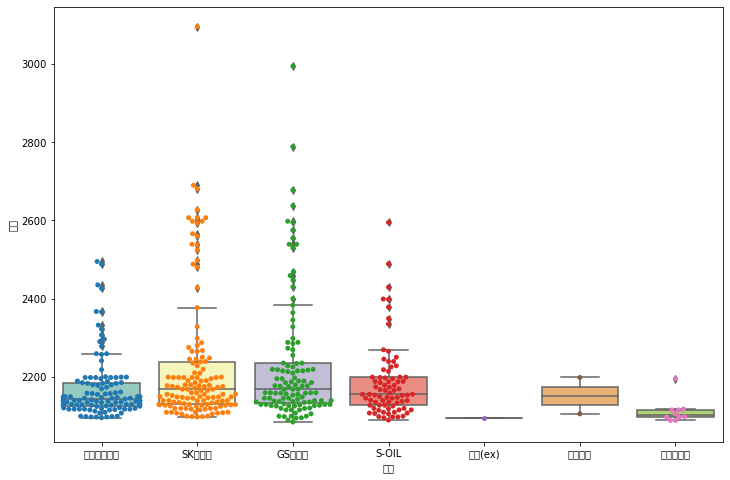

In [95]:
# 상표, 가격 boxplot+swarm 그리기
# boxplot은 swarm으로 같이 그려주는 게 좋음 
# seaborn 사용해야 함 
plt.figure(figsize=(12,8))
sns.boxplot(
    x = '상표',
    y = '가격',
    palette='Set3',
    data = stations
)
sns.swarmplot(
    x = '상표',
    y = '가격',
    data = stations
)
plt.show()

In [96]:
# 가격이 낮은 순으로 정렬 (top10)
stations.sort_values(by = '가격' , ascending = True).head(10)

,Oil_store,주소,가격,셀프,상표,구
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [97]:
# 가격이 높은 순으로 정렬 (top10)
stations.sort_values('가격' , ascending = False).head(10)

,Oil_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울특별시 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [98]:
# 가장 비싼 가격과 싼 가격 차이
stations['가격'].max() - stations['가격'].min()

1012

In [99]:
import numpy as np

In [100]:
# 구별 가격 평균 
gu_data = pd.pivot_table(stations,index=['구'],values=['가격'],aggfunc=np.mean)
gu_data

,가격
구,
강남구,2335.882353
강동구,2240.000000
강북구,2117.363636
강서구,2170.375000
관악구,2170.571429
광진구,2145.714286
구로구,2173.200000
금천구,2122.636364
노원구,2166.533333


In [101]:
# 구별 가격 평균 높은순(top10)
gu_data.sort_values(by='가격',ascending=False).head(10)

,가격
구,
용산구,2544.769231
중구,2466.500000
종로구,2387.125000
강남구,2335.882353
강동구,2240.000000
성동구,2239.470588
서초구,2232.758621
마포구,2212.416667
영등포구,2184.185185


### 지도표시

In [102]:
import json
import folium

In [103]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path,encoding='utf-8'))

map = folium.Map(
    location=[37.5502,126.982],
    zoom_start = 10.5,
    tiles='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str,
    data = gu_data,
    columns=[gu_data.index,'가격'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
map

In [104]:
# 가격이 제일 비싼 Top10구성
oil_price_top10 = stations.sort_values(by='가격',ascending=False).head(10)
oil_price_top10.reset_index(drop=True,inplace=True)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
0,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
1,서계주유소,서울특별시 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
2,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
3,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
4,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
5,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
6,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
7,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
8,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
9,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [105]:
# 가격이 제일 싼 Top10 구성
oil_price_bottom10 = stations.sort_values(by='가격',ascending=True).head(10)
oil_price_bottom10.reset_index(drop=True,inplace=True)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
0,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
1,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
2,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
3,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
4,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
5,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
6,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
7,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
8,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
9,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [106]:
oil_price_top10['주소'][1]

'서울특별시 용산구  청파로 367 (청파동)'

In [107]:
import urllib.request

client_id = "h2tcgb9fgs"
client_secret = "NPS3aLITU1cb1QcTUXuMTDrblGi9OAgoLSJS7dZD"

lat = []
lng = []

for n in range(len(oil_price_top10)):
    encText = urllib.parse.quote(oil_price_top10['주소'][n])
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:"+ rescode)

    import json
    data1 = json.loads(enText)
    lng.append(data1['addresses'][0]['x'])
    lat.append(data1['addresses'][0]['y'])
print(data1)

{'status': 'OK', 'meta': {'totalCount': 1, 'page': 1, 'count': 1}, 'addresses': [{'roadAddress': '서울특별시 용산구 한남대로21길 4 SK주유소', 'jibunAddress': '서울특별시 용산구 한남동 704-14 SK주유소', 'englishAddress': '4, Hannam-daero 21-gil, Yongsan-gu, Seoul, Republic of Korea', 'addressElements': [{'types': ['SIDO'], 'longName': '서울특별시', 'shortName': '서울특별시', 'code': ''}, {'types': ['SIGUGUN'], 'longName': '용산구', 'shortName': '용산구', 'code': ''}, {'types': ['DONGMYUN'], 'longName': '한남동', 'shortName': '한남동', 'code': ''}, {'types': ['RI'], 'longName': '', 'shortName': '', 'code': ''}, {'types': ['ROAD_NAME'], 'longName': '한남대로21길', 'shortName': '한남대로21길', 'code': ''}, {'types': ['BUILDING_NUMBER'], 'longName': '4', 'shortName': '4', 'code': ''}, {'types': ['BUILDING_NAME'], 'longName': 'SK주유소', 'shortName': 'SK주유소', 'code': ''}, {'types': ['LAND_NUMBER'], 'longName': '704-14', 'shortName': '704-14', 'code': ''}, {'types': ['POSTAL_CODE'], 'longName': '04401', 'shortName': '04401', 'code': ''}], 'x': '127.0061196

In [108]:
lng

['126.9721764',
 '126.9689935',
 '126.9936785',
 '126.9724921',
 '126.9653682',
 '127.0126262',
 '127.0471387',
 '126.9931989',
 '127.0061496',
 '127.0061196']

In [109]:
lat

['37.5583881',
 '37.5523505',
 '37.5609181',
 '37.5502224',
 '37.5215820',
 '37.5590707',
 '37.5115603',
 '37.5222584',
 '37.5360079',
 '37.5347069']

In [110]:
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng

In [111]:
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구,37.5583881,126.9721764
1,서계주유소,서울특별시 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구,37.5523505,126.9689935
2,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구,37.5609181,126.9936785
3,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구,37.5502224,126.9724921
4,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구,37.5215820,126.9653682
5,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구,37.5590707,127.0126262
6,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구,37.5115603,127.0471387
7,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구,37.5222584,126.9931989
8,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구,37.5360079,127.0061496
9,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구,37.5347069,127.0061196


In [112]:
import urllib.request

client_id = "h2tcgb9fgs"
client_secret = "NPS3aLITU1cb1QcTUXuMTDrblGi9OAgoLSJS7dZD"

lat2 = []
lng2 = []

for n in range(len(oil_price_bottom10)):
    encText = urllib.parse.quote(oil_price_bottom10['주소'][n])
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:"+ rescode)

    import json
    data2 = json.loads(enText)
    lng2.append(data2['addresses'][0]['x'])
    lat2.append(data2['addresses'][0]['y'])
print(data2)

{'status': 'OK', 'meta': {'totalCount': 1, 'page': 1, 'count': 1}, 'addresses': [{'roadAddress': '서울특별시 강북구 도봉로 200 미아셀프주유소', 'jibunAddress': '서울특별시 강북구 미아동 197-14 미아셀프주유소', 'englishAddress': '200, Dobong-ro, Gangbuk-gu, Seoul, Republic of Korea', 'addressElements': [{'types': ['SIDO'], 'longName': '서울특별시', 'shortName': '서울특별시', 'code': ''}, {'types': ['SIGUGUN'], 'longName': '강북구', 'shortName': '강북구', 'code': ''}, {'types': ['DONGMYUN'], 'longName': '미아동', 'shortName': '미아동', 'code': ''}, {'types': ['RI'], 'longName': '', 'shortName': '', 'code': ''}, {'types': ['ROAD_NAME'], 'longName': '도봉로', 'shortName': '도봉로', 'code': ''}, {'types': ['BUILDING_NUMBER'], 'longName': '200', 'shortName': '200', 'code': ''}, {'types': ['BUILDING_NAME'], 'longName': '미아셀프주유소', 'shortName': '미아셀프주유소', 'code': ''}, {'types': ['LAND_NUMBER'], 'longName': '197-14', 'shortName': '197-14', 'code': ''}, {'types': ['POSTAL_CODE'], 'longName': '01133', 'shortName': '01133', 'code': ''}], 'x': '127.0264497', 'y'

In [113]:
oil_price_bottom10['lat'] = lat2
oil_price_bottom10['lng'] = lng2

In [114]:
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구,37.6198926,127.0290662
1,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구,37.5315671,126.8560525
2,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구,37.5407640,126.8414743
3,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구,37.5106122,126.8476904
4,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구,37.5339098,126.8291785
5,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구,37.6422267,127.0295514
6,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구,37.5013196,126.8975277
7,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구,37.4413366,126.9030994
8,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구,37.4602299,127.0419172
9,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구,37.6265323,127.0264497


In [115]:
# oil_price_top10 지도에 표시하기 

map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
)

i = -1
for name,lng,lat in zip(oil_price_top10.구,oil_price_top10.lng,oil_price_top10.lat):
    i += 1
    folium.Marker([lat,lng],popup=name,icon=folium.Icon(icon='flag',color='red')).add_to(map)
    folium.CircleMarker(
        [lat,lng],
        radius = 20,
        color = 'red',
        fill = True,
        fill_color = 'red',
        popup=name
        ).add_to(map)
i = -1
for name,lng,lat in zip(oil_price_bottom10.구,oil_price_bottom10.lng,oil_price_bottom10.lat):
    i += 1
    folium.Marker([lat,lng],popup=name,icon=folium.Icon(icon='flag',color='blue')).add_to(map)
    folium.CircleMarker(
        [lat,lng],
        radius = 20,
        color = 'cornflowerblue',
        fill = True,
        fill_color = 'cornflowerblue',
        popup=name
        ).add_to(map)

map

---
# 도미노 매장 지도에 표시하기

In [116]:
domino = pd.read_csv("../Data/dominoMaejang.csv")
domino_seoul = domino.head(103)

In [117]:
seoul = [region.split()[0] for region in domino['매장주소']][:103]

In [118]:
seoul[44] = '서울특별시'

In [119]:
seoul[73] = '서울특별시'

In [120]:
seoul

['서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',


In [121]:
seoul_gu = [region.split()[1] for region in domino['매장주소']][:103]

In [122]:
seoul_gu

['강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강동구',
 '강동구',
 '강동구',
 '강동구',
 '강북구',
 '강북구',
 '강북구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '구로구',
 '구로구',
 '구로구',
 '구로구',
 '금천구',
 '금천구',
 '노원구',
 '노원구',
 '노원구',
 '노원구',
 '노원구',
 '도봉구',
 '도봉구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동대문구',
 '동작구',
 '동작구',
 '동작구',
 '마포구',
 '마포구',
 '마포구',
 '마포구',
 '서대문구',
 '서대문구',
 '서대문구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '서초구',
 '성동구',
 '성동구',
 '성동구',
 '성동구',
 '성북구',
 '성북구',
 '송파구',
 '송파구',
 '송파구',
 '송파구',
 '송파구',
 '송파구',
 '송파구',
 '송파구',
 '송파구',
 '양천구',
 '양천구',
 '양천구',
 '영등포구',
 '영등포구',
 '영등포구',
 '영등포구',
 '영등포구',
 '용산구',
 '용산구',
 '용산구',
 '용산구',
 '은평구',
 '은평구',
 '은평구',
 '은평구',
 '은평구',
 '종로구',
 '종로구',
 '종로구',
 '종로구',
 '중구',
 '중구',
 '중랑구',
 '중랑구']

In [123]:
domino_seoul['자치구명'] = list(seoul)
domino_seoul['구명'] = list(seoul_gu)
domino_seoul.head(103)

,지점명,매장주소,자치구명,구명
0,개포,"서울특별시 강남구 논현로 58 (개포동, 동진빌딩)",서울특별시,강남구
1,논현,서울특별시 강남구 학동로4길 15,서울특별시,강남구
2,대치,서울특별시 강남구 대치동 역삼로 444,서울특별시,강남구
3,삼성,서울특별시 강남구 봉은사로 451 (삼성동),서울특별시,강남구
4,압구정,서울특별시 강남구 압구정로 306 (신사동),서울특별시,강남구
...,...,...,...,...
98,평창,"서울특별시 종로구 평창문화로 75 글로리아타운 비동 102,103호",서울특별시,종로구
99,명동,서울특별시 중구 마른내로 47 (초동),서울특별시,중구
100,신당,서울특별시 중구 다산로 156 (신당동),서울특별시,중구
101,면목,"서울특별시 중랑구 용마산로86길 9-27, 상가 104호 (면목동, 신성미소지움아파트)",서울특별시,중랑구


In [124]:
domino_seoul=domino_seoul[['자치구명','구명','지점명','매장주소']]

In [125]:
domino_seoul.head()

,자치구명,구명,지점명,매장주소
0,서울특별시,강남구,개포,"서울특별시 강남구 논현로 58 (개포동, 동진빌딩)"
1,서울특별시,강남구,논현,서울특별시 강남구 학동로4길 15
2,서울특별시,강남구,대치,서울특별시 강남구 대치동 역삼로 444
3,서울특별시,강남구,삼성,서울특별시 강남구 봉은사로 451 (삼성동)
4,서울특별시,강남구,압구정,서울특별시 강남구 압구정로 306 (신사동)


In [126]:
domino_seoul.head()

,자치구명,구명,지점명,매장주소
0,서울특별시,강남구,개포,"서울특별시 강남구 논현로 58 (개포동, 동진빌딩)"
1,서울특별시,강남구,논현,서울특별시 강남구 학동로4길 15
2,서울특별시,강남구,대치,서울특별시 강남구 대치동 역삼로 444
3,서울특별시,강남구,삼성,서울특별시 강남구 봉은사로 451 (삼성동)
4,서울특별시,강남구,압구정,서울특별시 강남구 압구정로 306 (신사동)


In [127]:
# 도미노 매장 서울지점 위도경도 데이터 추출
import urllib.request

client_id = "h2tcgb9fgs"
client_secret = "NPS3aLITU1cb1QcTUXuMTDrblGi9OAgoLSJS7dZD"

domino_lat = []
domino_lng = []
ext = []
for n in domino_seoul['매장주소']:
    encText = urllib.parse.quote(n)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:"+ rescode)

    import json
    data1 = json.loads(enText)

    try:
        domino_lat.append(data1['addresses'][0]['x'])
        domino_lng.append(data1['addresses'][0]['y'])
    except:
        ext.append(n)
print(data1)

{'status': 'OK', 'meta': {'totalCount': 1, 'page': 1, 'count': 1}, 'addresses': [{'roadAddress': '서울특별시 중랑구 망우로 377 성환빌딩', 'jibunAddress': '서울특별시 중랑구 상봉동 74-46 성환빌딩', 'englishAddress': '377, Mangu-ro, Jungnang-gu, Seoul, Republic of Korea', 'addressElements': [{'types': ['SIDO'], 'longName': '서울특별시', 'shortName': '서울특별시', 'code': ''}, {'types': ['SIGUGUN'], 'longName': '중랑구', 'shortName': '중랑구', 'code': ''}, {'types': ['DONGMYUN'], 'longName': '상봉동', 'shortName': '상봉동', 'code': ''}, {'types': ['RI'], 'longName': '', 'shortName': '', 'code': ''}, {'types': ['ROAD_NAME'], 'longName': '망우로', 'shortName': '망우로', 'code': ''}, {'types': ['BUILDING_NUMBER'], 'longName': '377', 'shortName': '377', 'code': ''}, {'types': ['BUILDING_NAME'], 'longName': '성환빌딩', 'shortName': '성환빌딩', 'code': ''}, {'types': ['LAND_NUMBER'], 'longName': '74-46', 'shortName': '74-46', 'code': ''}, {'types': ['POSTAL_CODE'], 'longName': '02086', 'shortName': '02086', 'code': ''}], 'x': '127.0941497', 'y': '37.5987546',

In [128]:
ext

['서울특별시 강남구 대치동  역삼로 444', '서울특별시 구로구 오류동 오리로 1160, 101호 (오류동)']

In [129]:
domino_seoul.drop(index=31,inplace=True)

In [133]:
domino_seoul.drop(index=2,inplace=True)

In [134]:
domino_seoul.reset_index(drop=True,inplace=True)

In [135]:
domino_seoul['위도'] = domino_lat
domino_seoul['경도'] = domino_lng

In [136]:
domino_seoul.head()

,자치구명,구명,지점명,매장주소,위도,경도
0,서울특별시,강남구,개포,"서울특별시 강남구 논현로 58 (개포동, 동진빌딩)",127.0472399,37.4755612
1,서울특별시,강남구,논현,서울특별시 강남구 학동로4길 15,127.0235534,37.5105207
2,서울특별시,강남구,삼성,서울특별시 강남구 봉은사로 451 (삼성동),127.0490263,37.5120471
3,서울특별시,강남구,압구정,서울특별시 강남구 압구정로 306 (신사동),127.0347606,37.5288635
4,서울특별시,강남구,역삼,서울특별시 강남구 역삼로 146 청오빌딩,127.0353681,37.4945247


In [138]:
# oil_price_top10 지도에 표시하기 

map = folium.Map(
    location=[37.5502,126.982],
    zoom_start=11,
)

i = -1
for name,lat,lng in zip(domino_seoul.지점명,domino_seoul.경도,domino_seoul.위도):
    i += 1
    folium.Marker([lat,lng],popup=name,icon=folium.Icon(icon='flag',color='red')).add_to(map)
    folium.CircleMarker(
        [lat,lng],
        radius = 20,
        color = 'red',
        fill = True,
        fill_color = 'red',
        popup=name
        ).add_to(map)
map

In [139]:
domino_seoul.to_csv("../Data/domino_seoul.csv")

In [140]:
domino_seoul.head()

,자치구명,구명,지점명,매장주소,위도,경도
0,서울특별시,강남구,개포,"서울특별시 강남구 논현로 58 (개포동, 동진빌딩)",127.0472399,37.4755612
1,서울특별시,강남구,논현,서울특별시 강남구 학동로4길 15,127.0235534,37.5105207
2,서울특별시,강남구,삼성,서울특별시 강남구 봉은사로 451 (삼성동),127.0490263,37.5120471
3,서울특별시,강남구,압구정,서울특별시 강남구 압구정로 306 (신사동),127.0347606,37.5288635
4,서울특별시,강남구,역삼,서울특별시 강남구 역삼로 146 청오빌딩,127.0353681,37.4945247
